Why the fuck am i learning this twice? Jesus

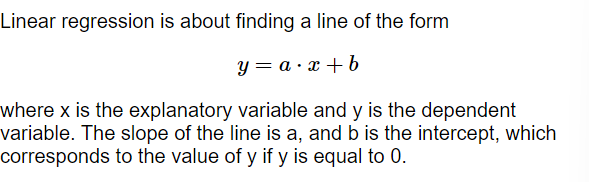

r:  0.6690276860464137
 (-3.200215004649192) + [0.75291757]*X


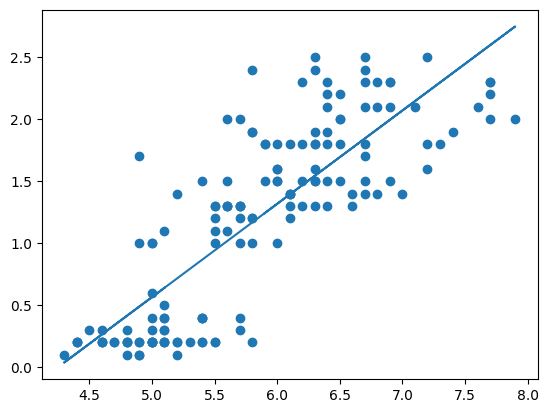

In [1]:
#simple linear regression cuz why fucking not (Sklearn)
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import accuracy_score

#load data
Df=load_iris()
df=pd.DataFrame(Df.data, columns=Df.feature_names)
#we boutta predict petal width with sepal length becz why fucking not?

X=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,3].values

#visualizing
fig, ax = plt.subplots()
ax.scatter(X,y)                     #fuck this ain't even linear cuh :(
model=LinearRegression()
model.fit(X,y)
print(f'r:  {model.score(X,y)}')
print(f' ({model.intercept_}) + {model.coef_}*X')           #b0 +b1x
predicted= model.predict(X)
ax.plot(X,predicted)
plt.show()

p:2.325498079793078e-37| r2: 0.8179411262715758


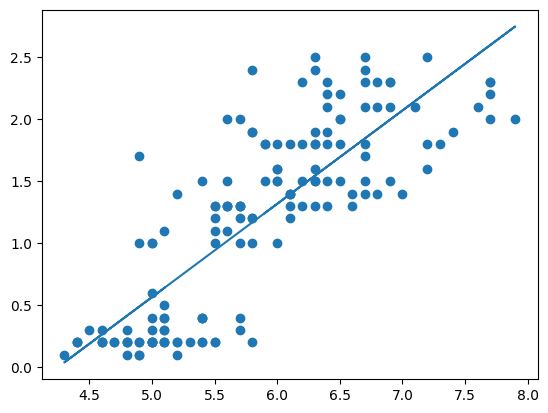

In [2]:
#With scipy.stats lingress      (yes, this is still gonnna be a simple reg) (can also be used for multilinear)

from scipy.stats import linregress

X=X.reshape(-1)
slope, intercept, r_value, p_value, std_err = linregress(X, y)


fig, ax = plt.subplots()
ax.scatter(X,y)
predicted=intercept+slope*X         #b0 +b1x
print(f'p:{p_value}| r2: {r_value}')
ax.plot(X, predicted)
plt.show()


R^2 :0.6156323046058156


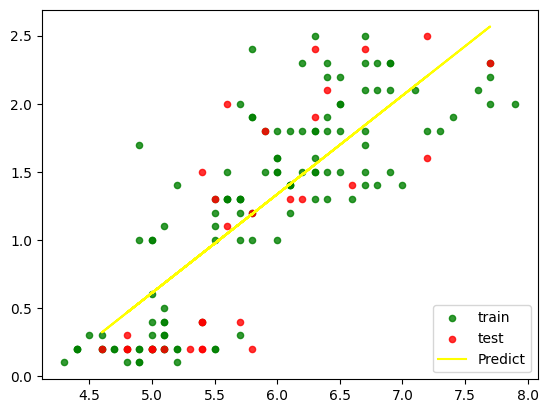

In [3]:
#idk the same but we gonna use train test split for ML application
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np

model=LinearRegression()
X=X.reshape(-1,1)

#traintest here
train_data, test_data, train_label, test_label = train_test_split(X,y, train_size= 0.8)
model.fit(train_data,train_label)

fig,ax =plt.subplots()
ax.scatter(train_data, train_label, s=20, c="green", label="train", alpha= 0.8)
ax.scatter(test_data, test_label, s=20, c="red", label="test", alpha=0.8)

predict=model.predict(test_data)
ax.plot(test_data, predict, c="yellow", label="Predict")
ax.legend(loc="lower right")
print(f'R^2 :{r2_score(test_label, predict)}')

0.9363365421573837


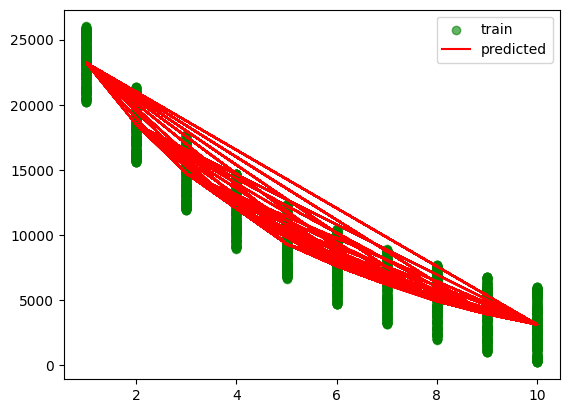

In [4]:
#Usage of regression in neural network (this works for shit, especially non linear)
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


#load dataset
df=np.loadtxt("Files/Carthing.txt", delimiter=" ")
X=df[:,0].reshape(-1,1)
y=df[:,1]

#train test split
train_data, test_data, train_label, test_label = train_test_split(X,y, random_state=324734, train_size= 0.8)

#visualizing for test cuz why not?
fig, ax =plt.subplots()

#getmodel of neuralnetwork
ANN=MLPRegressor(alpha= 1e-5, solver="lbfgs", random_state=1376427, hidden_layer_sizes=[100,100])
ANN.fit(train_data, train_label)

Predicted=ANN.predict(test_data)

ax.scatter(train_data, train_label, c="green", label="train", alpha=0.6)
ax.plot(test_data, Predicted, c="red", label="predicted")
ax.legend(loc="upper right")

print(f'{r2_score(test_label, Predicted)}')

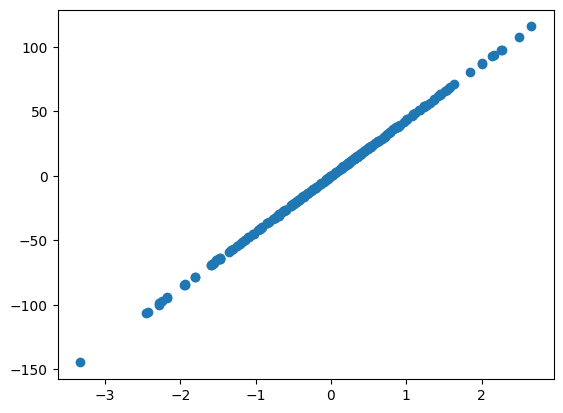

In [5]:
#making a linear regression data LMAO!
from sklearn.datasets import make_regression

#1 variable
df=make_regression(n_samples=250,               #N
                   n_features=1,                #variable
                   noise=0.2)                   #Noise

fig,ax =plt.subplots()
ax.scatter(df[0], df[1])


#multiple variables
df=make_regression(n_samples=250,
                   n_features=4,                #4 imndependent variables
                   noise =0.1) 

In [6]:
#making a neural network based from a fucking data generator
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression

#making the dataset
X,y = make_regression(n_samples=600,
                      n_features=4,
                      noise= 0.2)
Thefunny=np.concatenate((X,y.reshape(-1,1)), axis=1)                #Merge collumn
df=pd.DataFrame(Thefunny, columns=["X1", "X2", "X3", "X4", "Y"])
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values
print(df)
#train test split
train_data, test_data, train_label, test_label = train_test_split(X,y, train_size=0.8)

ANN=MLPRegressor(solver="lbfgs", alpha=1e-5, tol=1e-5, random_state=13278183, hidden_layer_sizes=[5,], max_iter=1000, verbose=10, activation="identity")
ANN.fit(train_data, train_label)
print(ANN.score(test_data, test_label))

           X1        X2        X3        X4           Y
0    0.392831  1.597884  0.125865  1.073152  123.814757
1    0.397907  0.397879  0.599676  0.075336   57.501549
2   -1.076168  1.715327 -1.347726 -0.883494 -195.246794
3    0.714689 -1.585961  0.344169 -0.544243    5.680932
4    0.071233  0.634456 -0.098332  0.374355   33.214457
..        ...       ...       ...       ...         ...
595  0.404593 -0.845364  0.003604 -2.480487 -192.059277
596  0.130164 -0.227199  0.616752  0.586061   85.348341
597 -0.222387 -0.065729 -0.010940 -1.619303 -152.640925
598 -3.248542 -0.543763  0.049111  0.407794 -149.237698
599  0.593583  0.110005  0.491752  0.844058  129.038804

[600 rows x 5 columns]
0.9999975420523588
